# Data Preparation

### Important Packages

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Functions

In [125]:
# Function to get the outliers and their index for the given data using Z score.
def zScoreOutliers(data, threshold):
    outliers = []

    # Set the threshold which we will use
    threshold = threshold
    mean = np.mean(data)
    std = np.std(data)

    # Calculate the Z score using this formula
    z_score= (data - mean)/std

    # Search for the outliers
    i = 0
    for value in data:
        z_score = (value - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append( [value, i] )
        i += 1
    return outliers

In [126]:
# Function to get the outliers and their index for the given data using IQR (Inter Quantile Range).
def iqrOutliers(data):
    outliers2 = []
    sorted_list = sorted(data)
    quantile1, quantile3 = np.percentile(sorted_list, [25,75])
    iqr_value = quantile3-quantile1
    lower_bound_val = quantile1 - (1.5 * iqr_value) 
    upper_bound_val = quantile3 + (1.5 * iqr_value)

    i = 0
    for value in data:
        if value < lower_bound_val or value > upper_bound_val:
            outliers2.append( [value, i] )
        i += 1
    return outliers2

In [127]:
def outlierHandling(data, outliers):
    mean = data.mean()
    for i in range( len(outliers) ):
        data.loc[ outliers[i][1] ] = mean


In [128]:
# Function to make standardization for the data
def Standardization(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    x_standardized = ((x - mean) / std)
    
    return x_standardized

In [129]:
df = pd.read_csv('Prostate_Cancer.csv')

In [130]:
df

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


In [131]:
df = df.drop( 'id' , axis = 1)

In [132]:
df.describe()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis_result   100 non-null    object 
 1   radius             100 non-null    int64  
 2   texture            100 non-null    int64  
 3   perimeter          100 non-null    int64  
 4   area               100 non-null    int64  
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.2+ KB


In [134]:
df.isna().sum()

diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [135]:
df = df.drop_duplicates()

In [136]:
rad_outliers_z = zScoreOutliers(df["radius"],3)
rad_outliers_iqr = iqrOutliers(df['radius'])
print(rad_outliers_z)
print(rad_outliers_iqr)

[]
[]


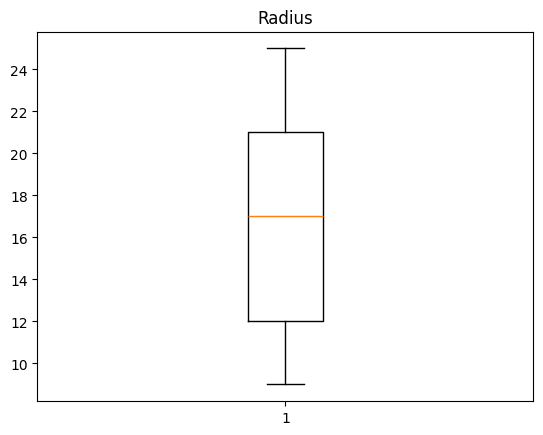

In [137]:
plt.boxplot(df['radius'])
plt.title("Radius")
plt.show()

In [138]:
tex_outliers_z = zScoreOutliers(df["texture"],3)
tex_outliers_iqr = iqrOutliers(df['texture'])
print(tex_outliers_z)
print(tex_outliers_iqr)

[]
[]


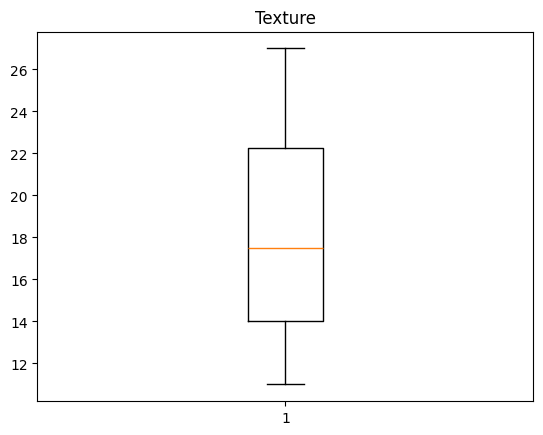

In [139]:
plt.boxplot(df['texture'])
plt.title("Texture")
plt.show()

In [140]:
per_outliers_z = zScoreOutliers(df["perimeter"],3)
per_outliers_iqr = iqrOutliers(df['perimeter'])
print(per_outliers_z)
print(per_outliers_iqr)

[[172, 82]]
[[172, 82]]


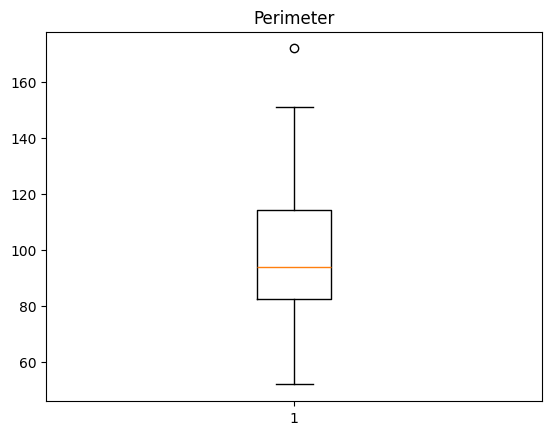

In [141]:
plt.boxplot(df['perimeter'])
plt.title("Perimeter")
plt.show()

In [142]:
outlierHandling(df["perimeter"], per_outliers_z)

C:\Users\Misara\AppData\Local\Temp\ipykernel_28684\3493015240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[ outliers[i][1] ] = mean
C:\Users\Misara\AppData\Local\Temp\ipykernel_28684\3493015240.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '96.78' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[ outliers[i][1] ] = mean


#### Just to make sure that the function is really handling the outliers

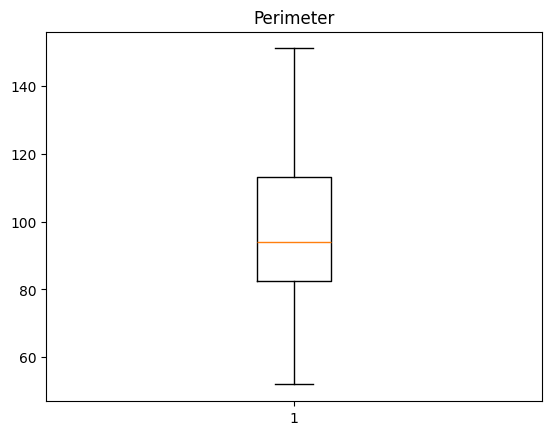

In [143]:
plt.boxplot(df['perimeter'])
plt.title("Perimeter")
plt.show()

In [144]:
area_outliers_z = zScoreOutliers(df["area"],3)
area_outliers_iqr = iqrOutliers(df['area'])
print(area_outliers_z)
print(area_outliers_iqr)

[[1878, 82]]
[[1878, 82]]


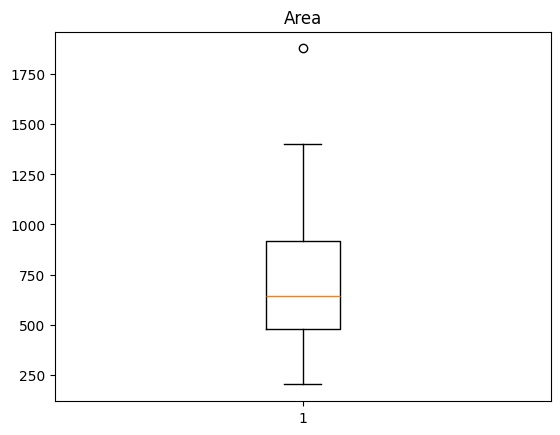

In [145]:
plt.boxplot(df['area'])
plt.title("Area")
plt.show()

In [146]:
outlierHandling(df["area"], area_outliers_z)

C:\Users\Misara\AppData\Local\Temp\ipykernel_28684\3493015240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[ outliers[i][1] ] = mean
C:\Users\Misara\AppData\Local\Temp\ipykernel_28684\3493015240.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '702.88' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[ outliers[i][1] ] = mean


In [147]:
smo_outliers_z = zScoreOutliers(df["smoothness"],2)
smo_outliers_iqr = iqrOutliers(df['smoothness'])
print(smo_outliers_z)
print(smo_outliers_iqr)

[[0.143, 0], [0.143, 1], [0.07, 3], [0.141, 4]]
[[0.143, 0], [0.143, 1], [0.141, 4]]


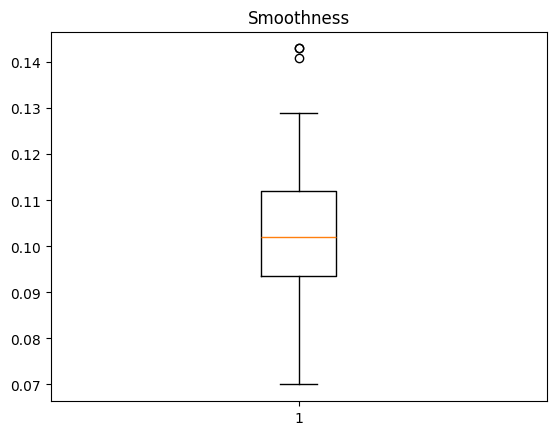

In [148]:
plt.boxplot(df['smoothness'])
plt.title("Smoothness")
plt.show()

In [149]:
outlierHandling(df["smoothness"], smo_outliers_iqr)

C:\Users\Misara\AppData\Local\Temp\ipykernel_28684\3493015240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[ outliers[i][1] ] = mean
C:\Users\Misara\AppData\Local\Temp\ipykernel_28684\3493015240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[ outliers[i][1] ] = mean
C:\Users\Misara\AppData\Local\Temp\ipykernel_28684\3493015240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[ outliers[i][1] ] = 

In [150]:
com_outliers_z = zScoreOutliers(df["compactness"],2)
com_outliers_iqr = iqrOutliers(df['compactness'])
print(com_outliers_z)
print(com_outliers_iqr)

[[0.278, 0], [0.284, 3], [0.345, 78], [0.267, 82]]
[[0.278, 0], [0.284, 3], [0.345, 78]]


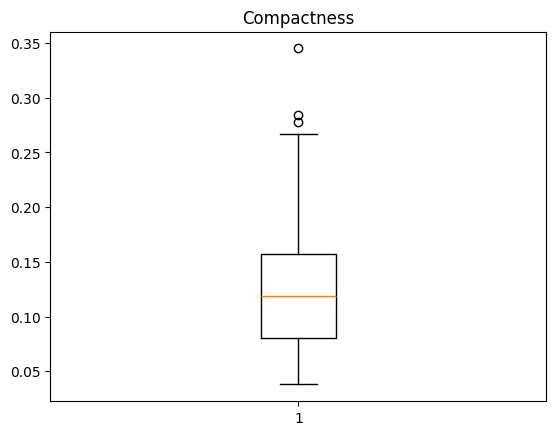

In [151]:
plt.boxplot(df['compactness'])
plt.title("Compactness")
plt.show()

In [152]:
outlierHandling(df["compactness"], com_outliers_iqr)

C:\Users\Misara\AppData\Local\Temp\ipykernel_28684\3493015240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[ outliers[i][1] ] = mean
C:\Users\Misara\AppData\Local\Temp\ipykernel_28684\3493015240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[ outliers[i][1] ] = mean
C:\Users\Misara\AppData\Local\Temp\ipykernel_28684\3493015240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[ outliers[i][1] ] = 

In [153]:
sym_outliers_z = zScoreOutliers(df["symmetry"], 2.5)
sym_outliers_iqr = iqrOutliers(df['symmetry'])
print(sym_outliers_z)
print(sym_outliers_iqr)

[[0.304, 25], [0.274, 60], [0.291, 78]]
[[0.304, 25], [0.274, 60], [0.291, 78]]


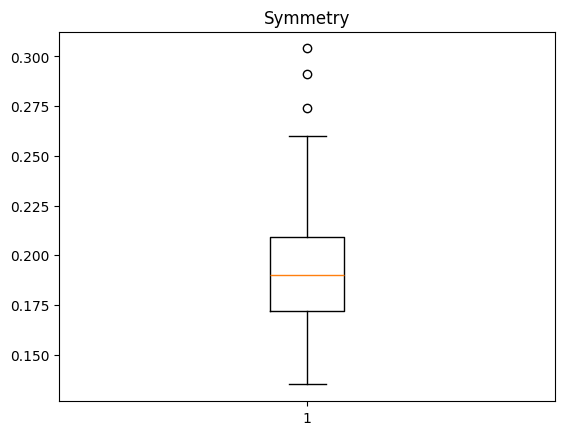

In [154]:
plt.boxplot(df['symmetry'])
plt.title("Symmetry")
plt.show()

In [155]:
outlierHandling(df["symmetry"], sym_outliers_z)

C:\Users\Misara\AppData\Local\Temp\ipykernel_28684\3493015240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[ outliers[i][1] ] = mean
C:\Users\Misara\AppData\Local\Temp\ipykernel_28684\3493015240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[ outliers[i][1] ] = mean
C:\Users\Misara\AppData\Local\Temp\ipykernel_28684\3493015240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[ outliers[i][1] ] = 

In [156]:
frac_outliers_z = zScoreOutliers(df["fractal_dimension"],3)
frac_outliers_iqr = iqrOutliers(df['fractal_dimension'])
print(frac_outliers_z)
print(frac_outliers_iqr)

[[0.097, 3], [0.09, 71]]
[[0.097, 3], [0.09, 71]]


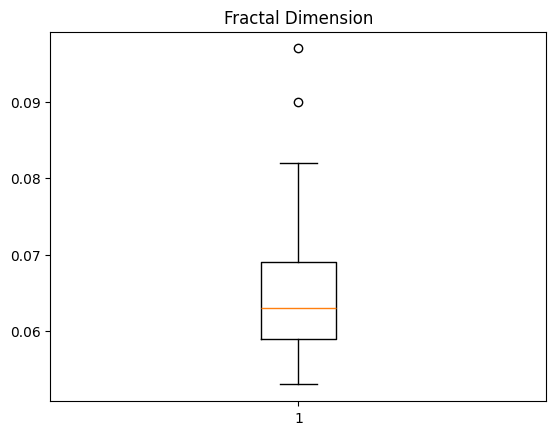

In [157]:
plt.boxplot(df['fractal_dimension'])
plt.title("Fractal Dimension")
plt.show()

In [158]:
outlierHandling(df["fractal_dimension"], frac_outliers_z)

C:\Users\Misara\AppData\Local\Temp\ipykernel_28684\3493015240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[ outliers[i][1] ] = mean
C:\Users\Misara\AppData\Local\Temp\ipykernel_28684\3493015240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[ outliers[i][1] ] = mean


#### Enconding the Categorical features

In [159]:
df = pd.get_dummies(df, columns=['diagnosis_result'], drop_first=True, dtype='int')
df

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result_M
0,23,12,151.0,954.0,0.10273,0.1267,0.242,0.07900,1
1,9,13,133.0,1326.0,0.10273,0.0790,0.181,0.05700,0
2,21,27,130.0,1203.0,0.12500,0.1600,0.207,0.06000,1
3,14,16,78.0,386.0,0.07000,0.1267,0.260,0.06469,1
4,9,19,135.0,1297.0,0.10273,0.1330,0.181,0.05900,1
...,...,...,...,...,...,...,...,...,...
95,23,16,132.0,1264.0,0.09100,0.1310,0.210,0.05600,1
96,22,14,78.0,451.0,0.10500,0.0710,0.190,0.06600,0
97,19,27,62.0,295.0,0.10200,0.0530,0.135,0.06900,0
98,21,24,74.0,413.0,0.09000,0.0750,0.162,0.06600,0


###  Exploratory Data Analysis (EDA)

#### Visualizing the categorical features

In [161]:
# Plotting bar chart of SEX feature
plt.figure(figsize=(8,5))
fig = df.sex.value_counts().plot(kind = 'bar', color=['blue','red'])
fig.set_xticklabels(labels = ['Male','Female'], rotation=0.9);
plt.ylabel("Amount")

AttributeError: 'DataFrame' object has no attribute 'sex'

<Figure size 800x500 with 0 Axes>

### Correlation Matrix
#### Shows the amount of each feature participation to the output.

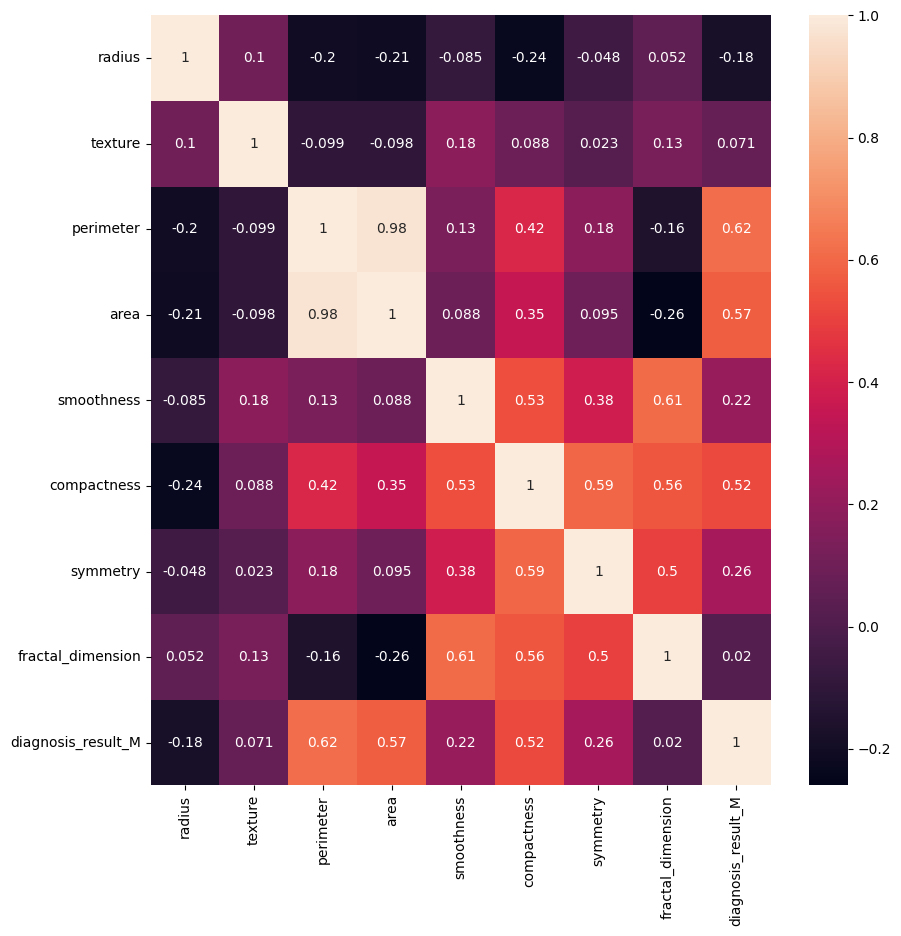

In [162]:
corr_matrix = df.corr()
plt.figure(figsize = (10,10))
sns_plot = sns.heatmap(corr_matrix, annot=True)

<Axes: xlabel='perimeter', ylabel='area'>

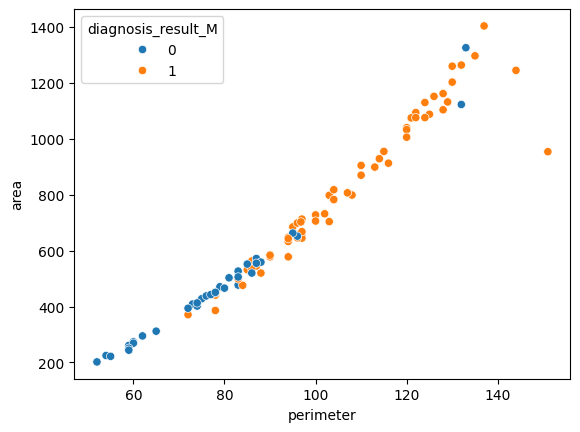

In [163]:
sns.scatterplot(x=df['perimeter'],y=df['area'], hue=df['diagnosis_result_M'])

<Axes: xlabel='compactness', ylabel='smoothness'>

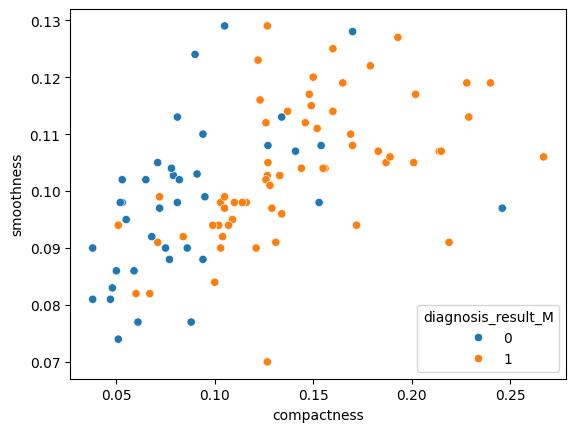

In [165]:
sns.scatterplot(x=df['compactness'],y=df['smoothness'], hue=df['diagnosis_result_M'])

In [167]:
df.to_csv('Prostate_Cancer_Preprocessed.csv', index=False)